In [149]:
import pandas as pd
df = pd.read_csv( '../database/inmuebles_bogota.csv' )
col = {
    'Tipo': 'type',
    'Descripcion':'description',
    'Habitaciones':'bedrooms',
    'Baños':'bathrooms',
    'Área':'area',
    'Barrio':'mayoralty',
    'UPZ':'suburb',
    'Valor':'value'
}
df = df.rename( columns = col )
df.sample(5)

,type,description,bedrooms,bathrooms,area,mayoralty,suburb,value
5058,Casa,Casa en venta en Bosque Popular,8,6,354,Bosque Popular,Las Ferias,$ 880.000.000
3270,Apartamento,Apartamento en venta en Chapinero,2,2,76,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 482.000.000
4285,Casa,Casa en venta en Usaquén,4,3,202,Usaquén,Usaquén,$ 1.200.000.000
2876,Apartamento,Apartamento en venta en Bosa,3,1,47,Bosa,Bosa Central,$ 134.000.000
661,Apartamento,Apartamento en venta en Antonio Nariño,3,2,59,Antonio Nariño,Restrepo,$ 245.000.000


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         9520 non-null   object
 1   description  9520 non-null   object
 2   bedrooms     9520 non-null   int64 
 3   bathrooms    9520 non-null   int64 
 4   area         9520 non-null   int64 
 5   mayoralty    9520 non-null   object
 6   suburb       9478 non-null   object
 7   value        9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [151]:
type( df.value[0] )

str

In [152]:
df.value[0] + df.value[1] + df.value[:5]

0      $ 360.000.000$ 670.000.000$ 360.000.000
1      $ 360.000.000$ 670.000.000$ 670.000.000
2    $ 360.000.000$ 670.000.000$ 1.120.000.000
3      $ 360.000.000$ 670.000.000$ 890.000.000
4      $ 360.000.000$ 670.000.000$ 970.000.000
Name: value, dtype: object

La funcion split nos permite separar caenas con lo que se secelcione a divir, por default su separacion es el espacio.

In [153]:
df.value[0].split()

['$', '360.000.000']

In [154]:
type( df['value'].str.split() )

pandas.core.series.Series

In [155]:
df['value'].str.split()

0         [$, 360.000.000]
1         [$, 670.000.000]
2       [$, 1.120.000.000]
3         [$, 890.000.000]
4         [$, 970.000.000]
               ...        
9515      [$, 290.000.000]
9516      [$, 670.000.000]
9517      [$, 900.000.000]
9518      [$, 335.000.000]
9519      [$, 144.990.000]
Name: value, Length: 9520, dtype: object

La funcion str es una propiedad que convierte el valor a una string, con la propiedad expand nos permite separar la informcion por columnas y nos la muestra como una tabla

In [156]:
value = df['value'].str.split( expand = True )
df['currency'] = value[0]
df['price'] = value[1]
df.sample(3)

,type,description,bedrooms,bathrooms,area,mayoralty,suburb,value,currency,price
1704,Apartamento,Apartamento en venta en Cedritos,3,2,78,Cedritos,Usaquén,$ 300.000.000,$,300.000.000
1105,Apartamento,Apartamento en venta en Nicolas De Federman,3,2,122,Nicolas De Federman,Teusaquillo,$ 600.000.000,$,600.000.000
3838,Apartamento,Apartamento en venta en Mazuren,3,2,120,Mazuren,El Prado,$ 390.000.000,$,390.000.000


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         9520 non-null   object
 1   description  9520 non-null   object
 2   bedrooms     9520 non-null   int64 
 3   bathrooms    9520 non-null   int64 
 4   area         9520 non-null   int64 
 5   mayoralty    9520 non-null   object
 6   suburb       9478 non-null   object
 7   value        9520 non-null   object
 8   currency     9520 non-null   object
 9   price        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [158]:
df['price'].sum()

'360.000.000670.000.0001.120.000.000890.000.000970.000.000510.000.000500.000.0002.350.000.000850.000.000642.000.000652.000.000168.000.000205.000.000300.000.000680.000.0002.519.000.000420.000.000620.000.000239.000.0001.600.000.000420.000.000625.000.0002.799.000.0001.450.000.0002.000.000.000670.000.0001.800.000.000469.000.000580.000.000445.000.000261.500.000278.000.000258.000.000520.000.000200.000.000129.000.000350.000.000290.500.000750.000.000495.000.000285.000.000900.000.0001.800.000.000990.000.000418.000.000349.000.000565.000.000370.000.000259.000.000310.000.000354.000.000372.000.000500.000.000420.000.0001.050.000.000185.000.000349.000.000515.000.000287.000.000265.000.000500.000.000261.500.000300.000.000278.000.000258.000.000520.000.000350.000.000290.500.000129.000.000200.000.000750.000.000418.000.000495.000.000349.000.000310.000.000565.000.000370.000.000259.000.000354.000.000285.000.000420.000.000372.000.000500.000.000185.000.0001.050.000.000349.000.0001.800.000.000900.000.000990.000

In [159]:
df['price'] = df['price'].str.replace( '.', '', regex = True )

In [160]:
df[ [ 'price', 'mayoralty' ] ]

,price,mayoralty
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         9520 non-null   object
 1   description  9520 non-null   object
 2   bedrooms     9520 non-null   int64 
 3   bathrooms    9520 non-null   int64 
 4   area         9520 non-null   int64 
 5   mayoralty    9520 non-null   object
 6   suburb       9478 non-null   object
 7   value        9520 non-null   object
 8   currency     9520 non-null   object
 9   price        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


Con la funcion astype haemos una conversion de tipo de dato expecificando el fomato en formato String

In [162]:
df['price_K'] = df['price'].astype( 'float' ) / 1000000
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   type         9520 non-null   object 
 1   description  9520 non-null   object 
 2   bedrooms     9520 non-null   int64  
 3   bathrooms    9520 non-null   int64  
 4   area         9520 non-null   int64  
 5   mayoralty    9520 non-null   object 
 6   suburb       9478 non-null   object 
 7   value        9520 non-null   object 
 8   currency     9520 non-null   object 
 9   price        9520 non-null   object 
 10  price_K      9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [163]:
df.describe()

,bedrooms,bathrooms,area,price_K
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


La funcion set_option establece el valor de la opción especificada:
-   display.float_format : El invocable debe aceptar un número de coma flotante y devolver una cadena con el formato deseado del número. Esto se usa en algunos lugares
    *   lamnbda : Las expresiones lambda se usan idealmente cuando necesitamos hacer algo simple y estamos más interesados en hacer el trabajo rápidamente en lugar de nombrar formalmente la función. Las expresiones lambda también se conocen como funciones anónimas.
    *   x: '%.2f' % x => declaramos "x" con el cual indicamos que solo queremos mostrar 2 valores del residuo es decir dos valores despues del punto decimal, y dividimos el valor x para sacar el resuido esperado.
-   display.precision: Precisión de salida de punto flotante en términos de número de lugares después del decimal, para formato regular y notación científica.

In [164]:
pd.set_option( 'display.precision', 2 )
pd.set_option( 'display.float_format', lambda x: '%.2f' % x )
df.describe()

,bedrooms,bathrooms,area,price_K
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


Con la propiedad loc permite localizar los atibutos deseados

In [165]:
df.loc[ df['bedrooms'] == 110 ]

,type,description,bedrooms,bathrooms,area,mayoralty,suburb,value,currency,price,price_K
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


In [166]:
df.loc[ df['area'] == 2 ]

,type,description,bedrooms,bathrooms,area,mayoralty,suburb,value,currency,price,price_K
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


La sub propiedad de bins indicamos cuantos datos queremos mostrar

<Axes: ylabel='Frequency'>

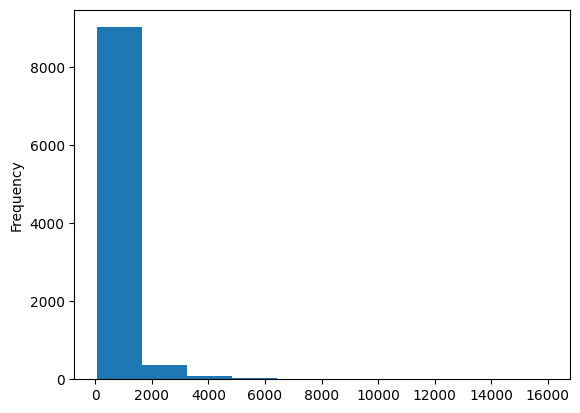

In [167]:
df['price_K'].plot.hist(bins=10)


Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib.Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos.

Matplotlib es una biblioteca completa para crear visualizaciones estáticas, animadas e interactivas en Python. Matplotlib hace que las cosas fáciles sean fáciles y las difíciles sean posibles.

La funcion figure ==> cree una nueva figura o active una figura existente.

La propiedad figsize ==> ancho, altura en pulgadas.

la funcion histplot ==> esta función puede normalizar la estadística calculada dentro de cada contenedor para estimar la frecuencia, la densidad o la masa de probabilidad, y puede agregar una curva suave obtenida mediante una estimación de la densidad del kernel.

La funcion set_title ==> establezca uno de los tres títulos de Axes disponibles. Los títulos disponibles se colocan encima de los ejes en el centro, alineados con el borde izquierdo y alineados con el borde derecho.

Las funciones xlim y y lim limitan la vizualizcion de los valores  definidos por el usuario

La funcion savegig permite exportar la imagen realizada por seaborn  dando el lugar a guarda y el fomato.

La funcion show permite visualizar la grafica quenerada.

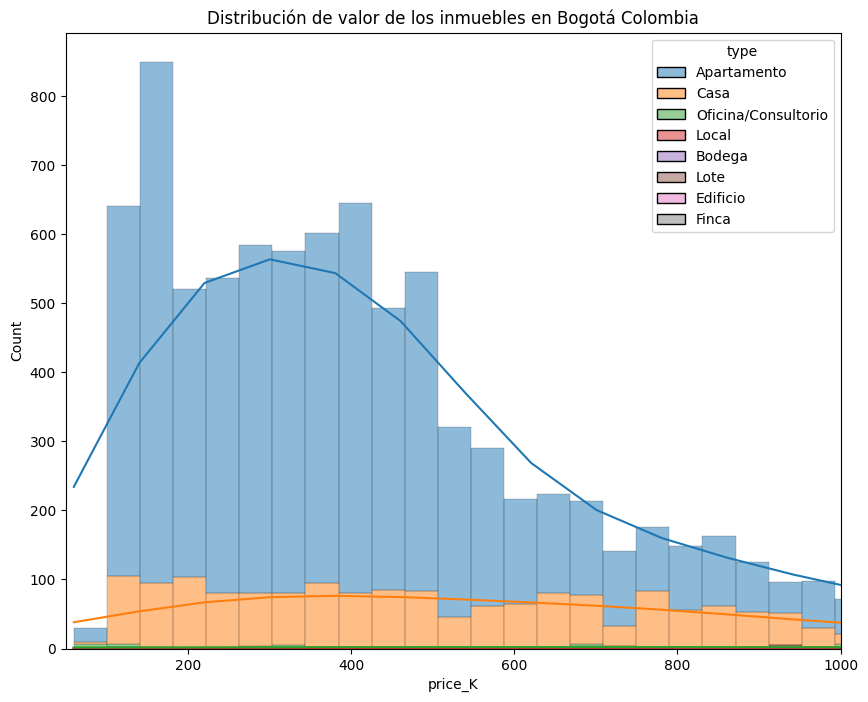

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure( figsize = ( 10, 8 ) )
graph = sns.histplot( df, x = 'price_K', kde = True, hue = 'type', multiple="stack" )
graph.set_title('Distribución de valor de los inmuebles en Bogotá Colombia')
plt.xlim( ( 50, 1000 ) )
#plt.ylim( ( 0, 20 ) )
plt.savefig( '../save/inmuebles_bogota.png', format = 'png' )
plt.show()